In [1]:
import SimpleITK as sitk
import numpy as np
import os
import cv2
from scipy import signal as sp
import matplotlib.pyplot as plt

In [2]:
dir_path = "/Users/amograo/Research_Projects/DL_HIE_2024/data_dir/BONBID2023_Train/3LABEL"
dir_adc_path = "/Users/amograo/Research_Projects/DL_HIE_2024/data_dir/BONBID2023_Train/1ADC_ss"
files = sorted(os.listdir(dir_path))
files_adc = sorted(os.listdir(dir_adc_path))

In [3]:
volumes = []

kernel = np.array([[100, -500, 60],
                   [-20, 0, -100],
                   [500, -60, 20]])

for i in range(len(files)):
    label_image = sitk.ReadImage(os.path.join(dir_path, files[i]))
    adc_image = sitk.ReadImage(os.path.join(dir_adc_path, files_adc[i]))
    label_array = sitk.GetArrayFromImage(label_image)
    adc_array = sitk.GetArrayFromImage(adc_image)

    n = adc_array.shape[0]

    for i in range (0, n):
        # pad ith image array 
        arr = adc_array[i, :, :]
        arr = sp.convolve(arr, kernel, mode='same')
        arr[((arr > -0.5) & (arr < 0.5))] = 0
        arr[arr != 0] = 1
        adc_array[i, :, :] = arr

    lesion_label_value = brain_label_value = 1
    lesion_voxel_count = np.sum(label_array == lesion_label_value)
    brain_voxel_count = np.sum(adc_array == brain_label_value)

    volumes.append(lesion_voxel_count*100/brain_voxel_count)

volumes = sorted(volumes)
print(*volumes,sep = '\n')
count_b1 = 0
count_1t5 = 0
count_a5 = 0

for i in volumes:
    if i < 1:
        count_b1 += 1
    elif 1 <= i <= 5:
        count_1t5 += 1
    elif i > 5:
        count_a5 += 1

print(count_b1, count_1t5, count_a5)

# make a prob distribution plot


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.010870573886760436
0.01497235105837886
0.02364472722582864
0.023733238400379733
0.02689566403473383
0.02707092582566324
0.02793476158755399
0.030075883768276884
0.03517204994431092
0.03669783323228133
0.03716781267422412
0.04495787642448054
0.04650750764051911
0.047753862946413345
0.04868134409191038
0.06799069601001968
0.07238572765311346
0.07661135864196286
0.0832072617246596
0.08549959716535951
0.09917985885943162
0.12097359549655629
0.12471730743647731
0.12954326745132874
0.15455442288720816
0.16251498601305447
0.16703786191536749
0.17438037791944197
0.1948666023479515
0.20932382461701005
0.22119397852151756
0.22943819508619864
0.26016187850217914
0.31457739791073125
0.3173811520935821
0.32796215274072493
0.41531790142307456
0.4435053323556276
0.49092278902471626
0.49145799204306106
0.5716285580961269
0.6128822413694267
0.7871845547802471
0.8566996225890852
0.9842440764944073
1.0444177671068426
1.0583292939085474
1.125752089515668
1.163365571794951
1.2

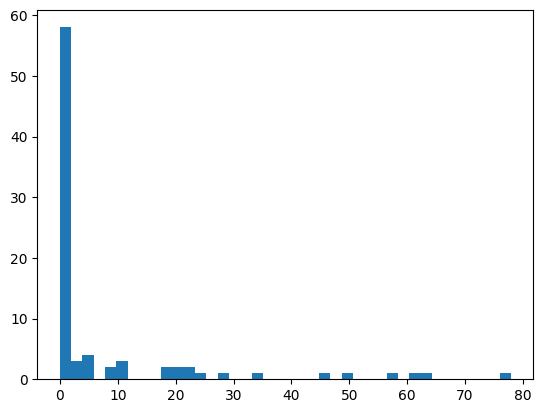

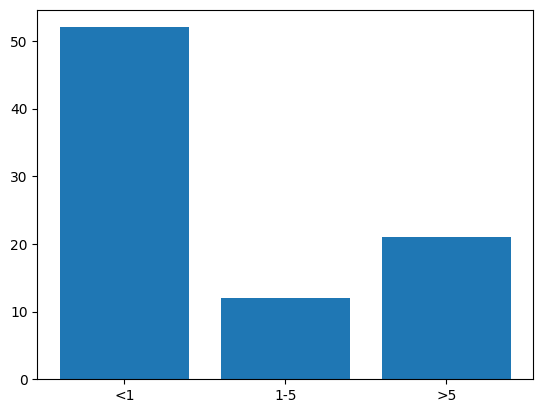

In [6]:
plt.hist(volumes, bins = 40)
plt.show()

# plot 3 bins: lesser than 1, 1 to 5 and more than 5
# plot a bar graph

labels = ['<1', '1-5', '>5']
values = [count_b1, count_1t5, count_a5]

plt.bar(labels, values)
plt.show()


In [61]:


# Define 3x3 kernel with sum 0
kernel = np.array([[100, -500, 60],
                   [-20, 0, -100],
                   [500, -60, 20]])

volume_percentage = []
for file in sorted(os.listdir(dir_path)):
    if file.endswith(".mha"):
        label_image = sitk.ReadImage(os.path.join(dir_path, file))
        spacing = label_image.GetSpacing()
        # print(f"Spacing for {file}: {spacing}")
        print(label_image.GetSize())
        label_array = sitk.GetArrayFromImage(label_image)
        print(len(label_array.flatten()))
        # break
        lesion_label_value = 1
        lesion_voxel_count = np.sum(label_array == lesion_label_value)
        brain_voxel_count = len(label_array.flatten())
        voxel_volume = spacing[0] * spacing[1] * spacing[2]
        lesion_volume = lesion_voxel_count * voxel_volume
        brain_volume = brain_voxel_count * voxel_volume

        lesion_volume_cm3 = lesion_volume / 1000
        brain_volume_cm3 = brain_volume / 1000

        lesion_percentage = (lesion_volume / brain_volume) * 100
        volume_percentage.append(lesion_percentage.item())
        # print(f"Lesion Volume for {file}: {lesion_volume_cm3:.2f} cm^3")
        # print(f"Brain Volume for {file}: {brain_volume_cm3:.2f} cm^3")
        # print(f"Lesion Percentage for {file}: {lesion_percentage:.2f}%")
        # print()

print(*sorted(volume_percentage),sep="\n")

# 1 
# 0

(128, 128, 16)
262144
(128, 128, 21)
344064
(128, 128, 51)
835584
(160, 144, 20)
460800
0.1125335693359375
0.24392361111111113
0.2594592524509804
5.896286737351191


In [ ]:
# if the pixels are same colour => then make everything zero or constant C.
# interpolate it 



In [ ]:
width = 128
height = 128
dir_path_2 = "/Users/amograo/Research_Projects/DL_HIE_2024/data_dir/BONBID2023_Train/1ADC_ss"
files_2 = sorted(os.listdir(dir_path_2))
img_stack = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dir_path_2, files_2[0])))
print(img_stack.shape)
img_stack_sm = np.zeros((img_stack.shape[1], width, height))

for idx in range(img_stack.shape[1]):
    img = img_stack[:, idx, :]
    img_sm = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)
    img_stack_sm[:, idx, :] = img_sm

print(img_stack_sm.shape)

In [ ]:
# show original and resized image side by side in the same image
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_stack[:, :, 40], cmap='gray')
axs[0].set_title("Original Image")
axs[1].imshow(img_stack_sm[:, :, 40], cmap='gray')
axs[1].set_title("Resized Image")
plt.show()

In [ ]:
num_slices = img_stack.shape[0]

# Define the grid size (adjust based on the number of slices)
cols = 8  # Number of columns in the grid
rows = num_slices // cols + (num_slices % cols > 0)  # Calculate rows required

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the slices and plot them
# Plot each coronal slice
for i in range(num_slices):
    coronal_slice = img_stack[i, :, :]  # Extract coronal slice at index i
    print(coronal_slice.shape)
    axes[i].imshow(coronal_slice, cmap="gray", origin="lower")
    # axes[i].set_title(f"Slice {i}")
    axes[i].axis('off')  # Hide the axes

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)

# Display the figure
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np 
import SimpleITK as sitk
import matplotlib.pyplot as plt
from scipy import signal as sp

def plot_array(image_array, title):
    num_slices = image_array.shape[0]
    print(image_array.shape)    
    cols = 8  # Number of columns in the grid
    rows = num_slices // cols + (num_slices % cols > 0)  # Calculate rows required

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each coronal slice
    for i in range(num_slices):
        coronal_slice = image_array[i, :, :]  # Extract coronal slice at index i
        # print(coronal_slice.shape)
        axes[i].imshow(coronal_slice, cmap="gray", origin="lower")
        # axes[i].set_title(f"Slice {i}")
        axes[i].axis('off')  # Hide the axes

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)

    # Display the figure
    plt.tight_layout()
    plt.show()

# Load an image
file = os.path.join(dir_path_2,files_2[0])  # Replace with the actual file path
image = sitk.ReadImage(file)
image_array = sitk.GetArrayFromImage(image) 

n = image_array.shape[0]
print(n)

# Define 3x3 kernel with sum 0
kernel = np.array([[100, -500, 60],
                   [-20, 0, -100],
                   [500, -60, 20]])

# make it 3x3x23
# kernel = np.repeat(kernel[:, :, np.newaxis], n, axis=2)

plot_array(image_array, "Original Image")

# array = sp.convolve(image_array,kernel,mode='same')
# # print(array.shape)
# array[((array > -0.5) & (array < 0.5))] = 0
# array[array != 0] = 1
# image_array = array

# Remove background
for i in range (0, n):
        # pad ith image array 
        arr = image_array[i, :, :]
        arr = sp.convolve(arr, kernel, mode='same')
        arr[((arr > -0.5) & (arr < 0.5))] = 0
        arr[arr != 0] = 1
        image_array[i, :, :] = arr

plot_array(image_array, "BG removed Image")
